# Random Sampling

## Contents

- [Imports](#section1)
- [Populations and Samples](#section2)
- [Monte Carlo Simulations](#section3)
    - [Random number generation](#subsection3.1)
    - [Simulations with continuous random variables](#subsection3.2)
    - [Simulations with discrete random variables](#subsection3.3)
    - [Monte Carlo simulations for decision-making](#subsection3.4)
- [Sampling Distributions](#section4)
    - [Estimate the population mean using the sample average](#subsection4.1)
    - [Central limit theorem](#subsection4.2)

## Imports <a id="section1"></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Populations and Samples <a id="section2"></a>

<div class="alert alert-block alert-danger">
    <b>Notes:</b>  
        <li> <b>Population</b>: The collection of all individuals or items under consideration in a statistical study.
        <li> <b>Sample</b>: A part of the population from which information is obtained.
</div>

We provide two other examples below for your reference.
1. A study on the percentage of US voters who support Trump in the 2020 election 
    - **Population**: all US voters
    - **Sample**: a poll of 1000 voters
2. A study on the average household income of all Singaporeans 
    - **Population**: all households in Singapore
    - **Sample**: a survey of 100 households in Singapore
    
<img src="https://s3-eu-west-1.amazonaws.com/blog.omniconvert.com-media/blog/wp-content/uploads/2019/10/21150245/sample-size-definition.png" width=450px>

A descriptive measure of a population, such as the expected value (mean), the median, and the standard deviation, is usually referred to as a **parameter** of the population. A descriptive measure of a sample is referred to as a **statistic**, as shown in the table below. 

| |Population Parameters|Sample Statistics|
|---:|----:|----:|
|mean value | population mean $\mu$ | sample average $\bar{X}$|
|standard deviation | population standard deviation $\sigma$ | sample standard deviation $s$ |
|Probability | population probability $p$ | sample proportion $\hat{p}$ |
|Distribution | PDF or PMF | histogram or density plot |

For various reasons, it is costly or impractical to directly identify population parameters, so instead, we will calculate the statistics of a sufficiently large sample, as the sample statistics may provide good approximations of the population parameters.


## Monte Carlo Simulations <a id="section3"></a>

As mentioned in the previous section that the sample statistics can be used to approximate population parameters. This idea inspired the **Monte Carlo methods**. The Monte Carlo methods learn about a system under uncertainty by simulating it with random sampling. 

### Random number generation <a id="subsection3.1"></a>

The `numpy.random` package provides functions for generating random variables for a great variety of continuous and discrete distributions. The syntax of calling these functions can be generalized as follows: 

<center><b><code>numpy.random.<i>distr</i>(<font color='blue'><i>shape_param_1</i></font>, <font color='blue'><i>shape_param_2</i></font>, ..., <font color='blue'><i>size</i></font> )</code></b></center>

- <b><code><i>distr</i></code></b> is the name of the function representing a distribution, such as <code>binom</code> for binomial and <code>normal</code> for normal distributions; 
- <b><code><font color='blue'><i>shape_param_1</i></font></code></b>, <b><code><font color='blue'><i>shape_param_2</i></font></code></b>, ... are the parameters specifying the shape of the distribution, such as the mean and the standard deviation specify the shape of a normal distribution;
- <b><code><font color='blue'><i>size</i></font></code></b> is the shape of the returned array of random numbers.

The table below summarizes functions and parameters for a few commonly used distributions.


Distribution| Parameters | Random functions | Remarks |
:-------:|:-------------------------:|:--------:|:------:|
Binomial| `n` as a positive integer <br> `p` as a probability | `binom` | - |
Poisson| `lam` as the mean value | `poisson` |  - |
Uniform | `low` as the lower bound <br>`high` as the upper bound | `uniform` | `low=0` and `high=1`, by default|
Normal | `loc` as the mean value <br>`scale` as the standard deviation | `normal` | `loc=0` and `scale=1`, by default|

For example, the following code segment is used to randomly generate a normally distributed sample of `size=1000` records. The mean and standard deviation of the normal distribution is specified to be 5 and 2.5, respectively. 

In [3]:
sample = np.random.normal(5, 2.5, size=1000)   # 1000 records following a normal distribution
pd.Series(sample).describe()                   

count    1000.000000
mean        5.054150
std         2.521438
min        -1.921194
25%         3.230842
50%         5.080288
75%         6.742580
max        13.228561
dtype: float64

Similarly, we can generate a sample with `size=1000` records and it follows a Poisson distribution with mean and variance to be 20.

In [4]:
sample = np.random.poisson(20, size=1000)    # 1000 records following a Poisson distribution
pd.Series(sample).describe()

count    1000.000000
mean       19.765000
std         4.495997
min         4.000000
25%        17.000000
50%        20.000000
75%        23.000000
max        36.000000
dtype: float64

Note that because the samples are randomly generated, the results of the statistics may be slightly different every time we run the code.

### Simulations with continuous random variables <a id="subsection3.2"></a>

<div class="alert alert-block alert-success">
<b>Example 1: </b> Suppose that the daily log returns on a stock are independent and normally distributed with mean 0.001 and standard deviation 0.015. If you buy $\$1000$ worth of this stock at time $t=1$, use Monte Carlo simulations to answer the following questions:
<li>What is the probability that after one trading day, i.e. at time $t=2$, your investment is worth less than $\$990$?</li>
<li>What is the probability that after five trading day, i.e. at time $t=6$, your investment is worth less than $\$990$?</li>
<li>What is the expected value of the investment after five trading day, i.e. at time $t=6$? </li>
<li>What is the variance of the investment after five trading day, i.e. at time $t=6$? </li>
</div>

According to the definition of log returns:

$$
r_t = \log\left(\frac{Q_t}{Q_{t-1}}\right),
$$

where $Q_t$ and $Q_{t-1}$ are the prices of an asset at time $t$ and $t-1$, respectively, we can derive that $r_2 = \log(Q_2/Q_1)$, which is equivalent to $Q_2 = Q_1\exp(r_2)$. The distribution of the random variable $r_2$ can be approximated by a sufficiently large random sample `log_returns`, generated by the code cell below.

In [7]:
mean = 0.001
std = 0.015
smp_size = 100000
 
log_returns = np.random.normal(mean, std, size=smp_size)
log_returns

array([-0.01932801,  0.0264799 ,  0.01948508, ..., -0.00667323,
       -0.0026697 , -0.00342844])

By using vectorized operation, a sample of the stock price $Q_2$ can be created, and the probability $P(Q_2 < 990)$ is approximated by the proportion of sampled prices that are less than $\$990$.

In [8]:
q2 = 1000 * np.exp(log_returns)
prob = (q2 < 990).mean()

print(f'The probability is {prob}')

The probability is 0.23209


In the calculation above, the `mean()` method is applied to a Boolean array, where the `True` values become ones and `False` values become zeros, so the final result is the proportion of `True` values.

At time $t=6$, we have 

$$
\begin{align}
r_2 + r_3 + ... + r_6 =& \log\left(\frac{Q_2}{Q_1}\right) + \log\left(\frac{Q_3}{Q_2}\right) + ... + \log\left(\frac{Q_6}{Q_5}\right) \\
=& \log\left(\frac{Q_2}{Q_1}\frac{Q_3}{Q_2}...\frac{Q_6}{Q_5}\right) = \log\left(\frac{Q_6}{Q_1}\right),
\end{align}
$$

so $Q_6 = Q_1\exp(r_2 + r_3 + ... + r_6)$. Since each random variable $r_i$ is independent and follows the same normal distribution, we can use the following code segment to generate `smp_size=100000` random records (rows) for five days (columns).

In [9]:
days = 5

log_returns = np.random.normal(mean, std, size=(smp_size, days))
log_returns

array([[-0.00028809, -0.02134056,  0.00432984,  0.00886608,  0.01726201],
       [-0.00384151,  0.00069213, -0.02731271, -0.03339662,  0.01639002],
       [ 0.02054959, -0.02585222, -0.02408827, -0.00091425,  0.03693824],
       ...,
       [ 0.03167795, -0.03318409, -0.02336518, -0.01393084,  0.00108092],
       [-0.01825456,  0.0375978 , -0.00154019,  0.00317404, -0.00772929],
       [ 0.02328923, -0.00111108, -0.00421046,  0.01567033, -0.00300419]])

In creating the random samples for $Q_6$, we need to take the summation of the log returns for all five days (all columns). The code is given below for calculating the probability of $Q_6 < 990$, together with the mean and variance of the stock price $Q_6$.

In [10]:
q6 = 1000 * np.exp(log_returns.sum(axis=1))
prob = (q6 < 990).mean()

print(f'The probability is {prob}')
print(f'The expected worth is {q6.mean()}')
print(f'The variance is {q6.var(ddof=1)}')

The probability is 0.3279
The expected worth is 1005.478787328792
The variance is 1145.1991340647648


Please note that in the default setting of the `var()` (or `std()`) method of NumPy arrays, the method calculates the **population variance** (or population standard deviation). In order to do the calculation for the **sample variance** (or sample standard deviation), we can use either one of the following approaches:

- Specify the keyword argument `ddof=1`. Here, the argument `ddof` indicates the **delta degrees of freedom**. 
- Convert the NumPy array into a series, as shown by the code below. The `var()` (or `std()`) method calculates the sample variance (or sample standard deviation) by default.

In [11]:
pd.Series(q6).var()

1145.1991340647648

It can be seen from the example above, the Monte Carlo simulation enables us to calculate some population parameters that are challenging to find out closed-form expressions. Besides, the simulation provides an entire sample distribution, which can be used to approximate the population distribution we are interested in. The distribution of the stock price $Q_6$, for example, can be visualized by the following histogram.

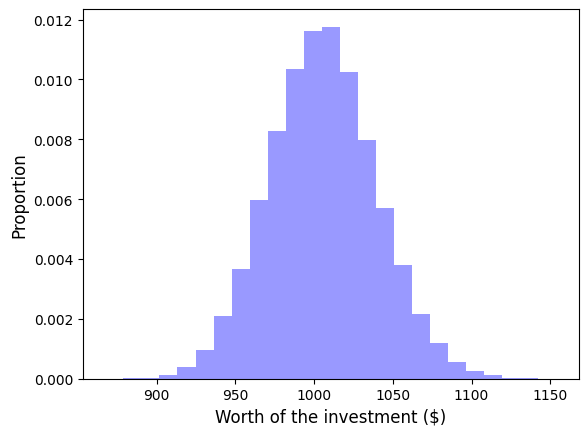

In [12]:
plt.hist(q6, bins=25, density=True, color='b', alpha=0.4)
plt.xlabel('Worth of the investment ($)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

### Simulations with discrete random variables <a id="subsection3.3"></a>

<div class="alert alert-block alert-success">
<b>Example 2: </b> We have a few identical dice, and the probabilities of the rolled numbers of each die are provided in the series <span style='font-family:Courier'><b>distr</b></span>. Let $X$ be a random variable representing the summation of five dice rolls.
<li>What is the expected value of $X$? </li>
<li>What is the variance of $X$? </li>
<li>What is the probability that $X$ is larger than 20? </li>
<li>What is the expected difference between the maximum and the minimum rolled numbers of the five dice? </li>
</div>

In [13]:
distr = pd.Series([0.15, 0.24, 0.18, 0.1, 0.21, 0.12], index=range(1, 7))
distr

1    0.15
2    0.24
3    0.18
4    0.10
5    0.21
6    0.12
dtype: float64

We are able to derive closed-from solutions for the first two questions.

In [14]:
outcomes = np.arange(1, 7)
probs = distr.values
n = 5

exp_one = (outcomes * probs).sum()
print(f'The expected value is {exp_one * n}')

The expected value is 16.7


In [15]:
var_one = ((outcomes - exp_one)**2 * probs).sum()
print(f'The expected value is {var_one * n}')

The expected value is 13.721999999999998


Alternatively, we can generate a sample of `smp_size=100000` records (rows) for five dice (columns). The sample statistics calculated below can be used to approximate population parameters.

In [16]:
smp_size = 100000
rolls = np.random.choice(outcomes, p=probs, size=(smp_size, n))
rolls

array([[2, 5, 5, 2, 2],
       [3, 6, 3, 6, 5],
       [1, 3, 6, 6, 3],
       ...,
       [1, 5, 2, 2, 6],
       [4, 3, 5, 5, 3],
       [4, 4, 2, 6, 2]])

In [17]:
xs = rolls.sum(axis=1)
print(f'The expected value from simulation is {xs.mean()}')
print(f'The variance from simulation is {xs.var(ddof=1)}')
print(f'P(X > 20) is {(xs > 20).mean()}')

The expected value from simulation is 16.69939
The variance from simulation is 13.748261110511107
P(X > 20) is 0.15713


The distribution of $X$ estimated using the randomly generated sample is shown below.

In [18]:
probs_sim = pd.Series(xs).value_counts(normalize=True)
probs_sim

17    0.10386
16    0.10365
18    0.09671
15    0.09530
19    0.08599
14    0.08326
20    0.07250
13    0.06886
21    0.05544
12    0.05179
22    0.03927
11    0.03662
23    0.02839
10    0.02234
24    0.01645
9     0.01218
25    0.00928
8     0.00676
26    0.00507
7     0.00242
27    0.00209
28    0.00091
6     0.00057
29    0.00018
5     0.00006
30    0.00005
dtype: float64

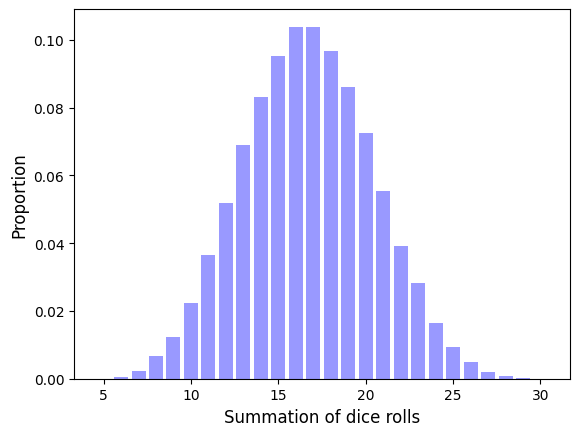

In [19]:
plt.bar(probs_sim.index, probs_sim, color='b', alpha=0.4)
plt.xlabel('Summation of dice rolls', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

The expected difference between the maximum and minimum rolled numbers can also be approximated by the sample results below, together with the distribution of the difference value.

In [20]:
diff = rolls.max(axis=1) - rolls.min(axis=1)

print(f'The expected difference is {diff.mean()}')

The expected difference is 3.72154


In [21]:
probs_diff = pd.Series(diff).value_counts(normalize=True)
probs_diff

4    0.40455
5    0.23595
3    0.23563
2    0.09447
1    0.02776
0    0.00164
dtype: float64

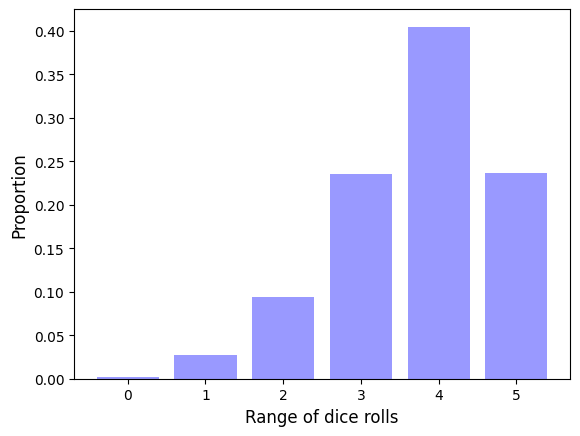

In [22]:
plt.bar(probs_diff.index, probs_diff, color='b', alpha=0.4)
plt.xlabel('Range of dice rolls', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

### Monte Carlo simulations for decision-making <a id="subsection3.4"></a>

Monte Carlo simulations are frequently used in prescriptive analytics for evaluating the performance of decisions under uncertainty. We can also use this approach to maximize the profit or minimize the cost, via a comparison of all feasible decisions. 

<div class="alert alert-block alert-success">
<b>Example 3: </b> A bakery is making croissants every day. The cost of every croissant is $\$0.6$ and is sold at a price of $\$2.5$. Suppose that the daily demand of croissants follows a Poisson distribution with a mean value $\mu=38.6$, and any unsold croissants will be disposed by the end of the day. What is the optimal number of croissants baked every day, so that the profit of the bakery is maximized?
</div>

We first generate a random sample to represent the demand of croissants, which follows a Poisson distribution. 

In [23]:
cost = 0.6
price = 2.5
mu = 38.6

smp_size = 100000
demand = np.random.poisson(mu, size=smp_size)

Then a `for`-loop is used to go through candidate decisions (e.g. integers from 20 to 60), as the numbers of croissants baked every day. There are three steps in each iteration of the loop:
1. We use the `np.minimum()` function to identify the minimum value between the demand and the number of croissants baked. The returned value of the function is the number of sold croissants.
2. The profits under all sampled demands are calculated altogether using vectorized operation. The average of the profit is then obtained using the `mean()` method. 
3. The expected profit is appended to the list `profits`, as the expected profit when the number of croissants baked is `decision`. 

Because the minimum value between the demand and the number of croissants baked is the number of croissants sold, we are using the `np.minimum()` function to identify the minimum between these two values. 

In [24]:
profits = []
decisions = np.arange(20, 61)
for decision in decisions:                              # Go through decisions from 20 to 60
    sold = np.minimum(demand, decision)                 # An array of sold quantities
    exp_profit = (price*sold - cost*decision).mean()    # The average of an array of profits
    profits.append(exp_profit)                          # Append the expected profits to the list

np.array(profits)

array([37.9979  , 39.89595 , 41.792375, 43.68575 , 45.574175, 47.454875,
       49.322675, 51.171125, 52.992375, 54.777325, 56.5132  , 58.183575,
       59.7755  , 61.27185 , 62.654375, 63.909225, 65.02705 , 65.9946  ,
       66.80495 , 67.453875, 67.9404  , 68.273625, 68.4617  , 68.514675,
       68.446825, 68.273725, 68.010025, 67.670775, 67.269125, 66.817325,
       66.32675 , 65.8056  , 65.2614  , 64.700175, 64.126525, 63.544125,
       62.9556  , 62.36345 , 61.768625, 61.172   , 60.5739  ])

Besides, we can obtain the same results using broadcasting, and there is no need to use a `for`-loop to iterate the numbers of croissants baked every day, see the code below.

In [25]:
solds = np.minimum(demand.reshape((smp_size, 1)), decisions)
solds

array([[20, 21, 22, ..., 45, 45, 45],
       [20, 21, 22, ..., 28, 28, 28],
       [20, 21, 22, ..., 34, 34, 34],
       ...,
       [20, 21, 22, ..., 43, 43, 43],
       [20, 21, 22, ..., 38, 38, 38],
       [20, 21, 22, ..., 42, 42, 42]])

In [26]:
profits = (price*solds - cost*decisions).mean(axis=0)
profits

array([37.9979  , 39.89595 , 41.792375, 43.68575 , 45.574175, 47.454875,
       49.322675, 51.171125, 52.992375, 54.777325, 56.5132  , 58.183575,
       59.7755  , 61.27185 , 62.654375, 63.909225, 65.02705 , 65.9946  ,
       66.80495 , 67.453875, 67.9404  , 68.273625, 68.4617  , 68.514675,
       68.446825, 68.273725, 68.010025, 67.670775, 67.269125, 66.817325,
       66.32675 , 65.8056  , 65.2614  , 64.700175, 64.126525, 63.544125,
       62.9556  , 62.36345 , 61.768625, 61.172   , 60.5739  ])

The optimal decision can be identified by the following code. Here, the `np.argmax()` function is used to identify the index of the maximum value in the array `profits`. Note that this index is also the index for accessing the optimal number of croissants in the array `decisions`. 

In [27]:
index_max = np.argmax(profits)           # The index of the maximum profit
optimal = decisions[index_max]           # Use the index to access the optimal decision

print(f'The optimal number is {optimal}')
print(f'The maximum profit is {np.max(profits)}')

The optimal number is 43
The maximum profit is 68.51467500011923


We can also visualize how the number of croissants baked every day affects the expected profit, shown by the figure below.

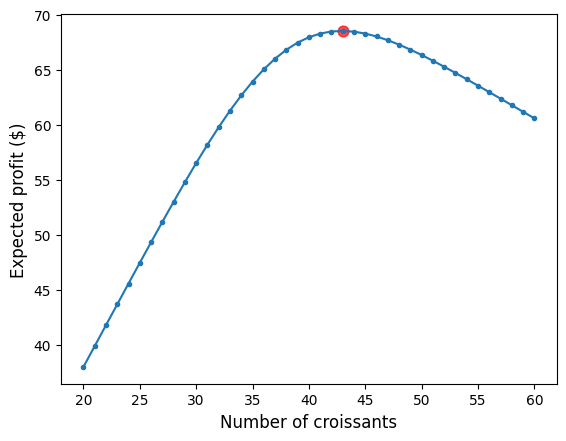

In [28]:
plt.plot(decisions, profits, marker='.')
plt.scatter(optimal, profits.max(), s=60, 
            alpha=0.7, color='r')
plt.xlabel('Number of croissants', fontsize=12)
plt.ylabel('Expected profit ($)', fontsize=12)
plt.show()

<div class="alert alert-block alert-info">
<b>Question 1: </b> The bakery in <b>Example 3</b> is planning to sell croissants at a discount price of $\$1.5$ in the last two hours each day. Suppose that the demand before the last two hours follows a Poisson distribution with a mean value $\mu_1=32.6$, and the demand during the last three hours follows a Poisson distribution with a mean value $\mu_2=16.5$. What is the optimal number of croissants baked every day, so that the profit of the bakery is maximized?
</div>

## Sampling Distributions <a id="section4"></a>

### Estimate the population mean using the the sample average <a id="subsection4.1"></a>

<div class="alert alert-block alert-success">
<b>Example 4:</b> The lifespans of all bulbs in a batch are recorded in a file called "bulb.csv". Consider this batch bulbs as the population, estimate the population mean using a randomly selected a sample with $n=25$ observations. Repeat the sampling experiment 1000 times to find the mean and standard deviation of the sample means. 
</div>

In [29]:
bulb = pd.read_csv('bulb.csv')
print(f'Population mean: {bulb.values.mean()}')
print(f'Population standard deviation: {bulb.values.std()}')

Population mean: 1351.245
Population standard deviation: 25.437524255752564


The code above shows that the population mean is $\mu=1351.245$, and the population standard deviation is $\sigma=25.438$. The distribution of the population is shown by the histogram below.

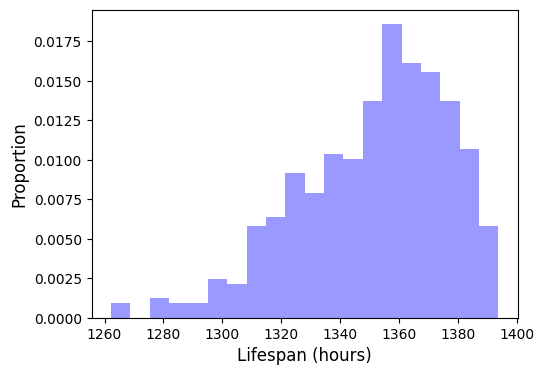

In [30]:
plt.figure(figsize=(5.5, 4))
plt.hist(bulb['Lifespan'], density=True, bins=20, color='b', alpha=0.4)
plt.xlabel('Lifespan (hours)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

It can be seen that the lifespans of these bulbs are not normally distributed (as demonstrated by the Q-Q plot below), and the population does not follow any distributions we know.

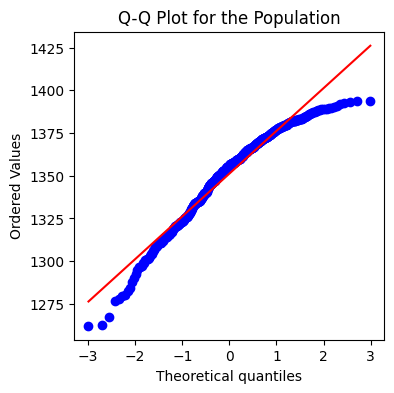

In [31]:
plt.figure(figsize=(4, 4))
stats.probplot(bulb['Lifespan'], plot=plt)
plt.title(f'Q-Q Plot for the Population')
plt.show()

In real applications, it is impractical to burn out all bulbs to find their lifespans. Instead, it is more economical to estimate the mean value via testing a sample that contains a small fraction of the overall population. As a simulation, we can use the `sample()` method to randomly select a given number of records from the dataset. In the sample code below, a sample of five records are randomly generated. In order to ensure that each record is selected independently, the keyword argument `replace` is specified to be `True`, meaning that the samples are selected with replacement. 

In [32]:
bulb['Lifespan'].sample(5, replace=True)

171    1366.423629
366    1357.417586
216    1350.951814
456    1371.909381
179    1355.252518
Name: Lifespan, dtype: float64

Similarly, we can randomly select a sample with $n=25$ records, and use the `mean()` method to calculate the sample average value.

In [33]:
sample = bulb['Lifespan'].sample(25, replace=True)
sample.mean()

1359.5942199767724

Although it is less costly and more practical to obtain the sample data, we cannot expect the sample yield perfectly accurate information about the population. For instance, the sample with $n=25$ records leads to an average very close to the population mean, but it is never the same. Besides, because the randomness involved in generating the sample, the sample average itself is random and varies every time we run the code. 

It can be seen that the sample average, denoted by $\bar{X}$, is another random variable. The distribution of $\bar{X}$ is called the **sampling distribution of the sample mean**. The standard deviation of $\bar{X}$ is often referred to as the **standard error of the sample mean**, and is written as $\text{SE}(\bar{X})$.

In order to illustrate the sampling distribution of the sample mean, we repeat the sampling experiments for 1000 times, the histogram of the 1000 sample averages are shown below.

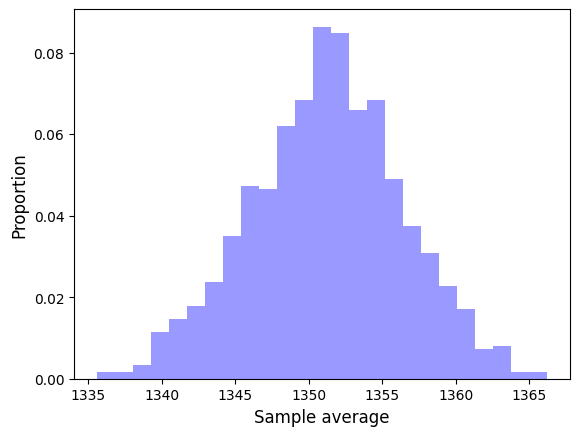

In [34]:
smp_size = 25
repeats = 1000

averages = []
for i in range(repeats):
    sample = bulb['Lifespan'].sample(smp_size, replace=True)
    averages.append(sample.mean())

plt.hist(averages, bins=25, density=True, color='b', alpha=0.4)
plt.xlabel('Sample average', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

The sampling distribution has a shape that is close to the normal distribution, and the Q-Q plot below has further verified that the sampling distribution approximates a normal distribution.

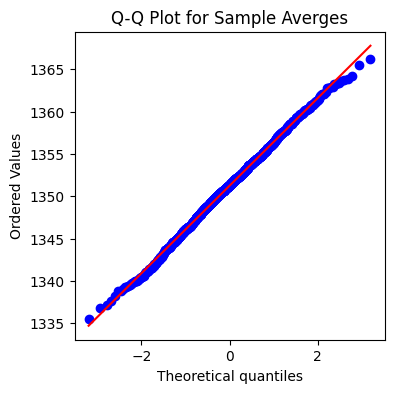

In [35]:
plt.figure(figsize=(4, 4))
stats.probplot(averages, plot=plt)
plt.title(f'Q-Q Plot for Sample Averges')
plt.show()

Some important statistics of these sample averages are obtained using the `describe()` method.

In [36]:
pd.Series(averages).describe()

count    1000.000000
mean     1351.247722
std         5.163803
min      1335.553190
25%      1347.833156
50%      1351.296425
75%      1354.633270
max      1366.246770
dtype: float64

In fact, we can derive the expected value and variance of the sample average $X$. Let $X_i$ be the $i$th record randomly and independently selected from the population. The sample average is written as $\bar{X}=\frac{1}{n}\sum_{i=1}^nX_i$, where $n$ is the sample size, so 

\begin{align}
\mathbb{E}(\bar{X}) = \mathbb{E}\left(\frac{1}{n}\sum\limits_{i=1}^nX_i\right) = \frac{1}{n}\sum\limits_{i=1}^n\mathbb{E}(X_i) = \frac{1}{n}\sum\limits_{i=1}^n\mu = \mu.
\end{align}
Note that $\mathbb{E}(\bar{X})$ is the same as the actual population mean $\mu$, the estimator $\bar{X}$ is thus called **unbiased**.

The variance of $\bar{X}$ can be written as
\begin{align}
\text{Var}(\bar{X}) = \text{Var}\left(\frac{1}{n}\sum\limits_{i=1}^nX_i\right) = \frac{1}{n^2}\sum\limits_{i=1}^n\text{Var}(X_i) = \frac{1}{n^2}n\sigma^2 = \frac{\sigma^2}{n}, 
\end{align}
so the standard error $\text{SE}(\bar{X})=\sqrt{\text{Var}(\bar{X})}=\sqrt{\sigma^2/n}=\frac{\sigma}{\sqrt{n}}$. In the example above, we have the sample size to be $n=25$, so $\text{SE}(\bar{X})$ is one fifth of the population standard deviation $\sigma$. 

### Central limit theorem <a id="subsection4.2"></a>

The results in **Example 4** can be generalized for population following other distributions. You could use the website [Programming for Business Analytics](https://appiora.nus.edu.sg/learndao/) to explore these cases and to verify the **Central Limit Theorem (CLT)**.

<div class="alert alert-block alert-danger">
<b>Notes: The Central Limit Theorem (CLT): </b>  
    For a relatively large sample size, the random variable $\bar{X}=\frac{1}{n}\sum_{i=1}^nX_i$ is approximately normally distributed, regardless of the distribution of the population. The approximation becomes better with increased sample size. 
</div>